## Project Objective
The goal of this project is to analyze COVID-19 health data 
and compare trends in cases and mortality across countries.

## Methodology
Data cleaning, exploratory data analysis, and visualization
techniques were applied using Python.

## Conclusion
The analysis indicates that death rates differ significantly
between countries, which may be influenced by healthcare
systems, testing policies, and vaccination rates.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [14]:
countries = ['Turkey', 'Germany', 'United States']
df = df[df['location'].isin(countries)]
df[['location', 'date', 'total_cases', 'total_deaths']].head()

,location,date,total_cases,total_deaths
113525,Germany,2020-01-03,NaN,NaN
113526,Germany,2020-01-04,1.0,NaN
113527,Germany,2020-01-05,1.0,3.0
113528,Germany,2020-01-06,1.0,3.0
113529,Germany,2020-01-07,1.0,3.0


In [15]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['date'] = pd.to_datetime(df['date'])

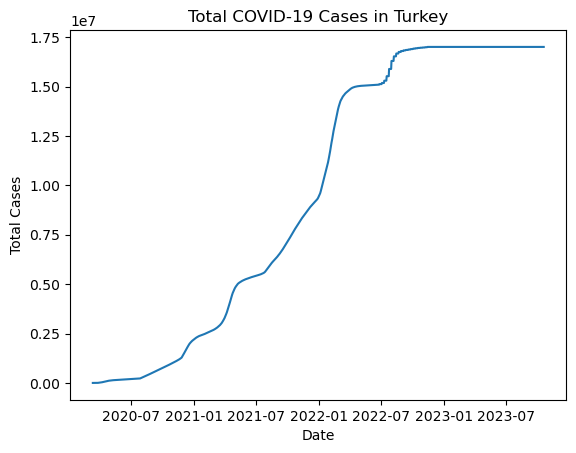

In [16]:
turkey = df[df['location'] == 'Turkey']

plt.figure()
plt.plot(turkey['date'], turkey['total_cases'])
plt.title("Total COVID-19 Cases in Turkey")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

**Observation:**  
Total COVID-19 cases in Turkey show a steady increase over time, 
with noticeable peaks during certain periods.


In [27]:
df['death_rate'] = df['total_deaths'] / df['total_cases']

clean_table = df[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']]
clean_table = clean_table.dropna()

clean_table['death_rate_percent'] = clean_table['death_rate'] * 100
clean_table['death_rate_percent'] = clean_table['death_rate_percent'].round(2)

latest_data = clean_table.sort_values('date').groupby('location').tail(1)

latest_data[['location', 'date', 'death_rate_percent']]
latest_data.head()

,location,date,total_cases,total_deaths,death_rate,death_rate_percent
319785,Turkey,2023-10-18,17004677.0,101419.0,0.005964,0.60
114909,Germany,2023-10-18,38437756.0,174979.0,0.004552,0.46
330865,United States,2023-10-18,103436829.0,1136920.0,0.010991,1.10


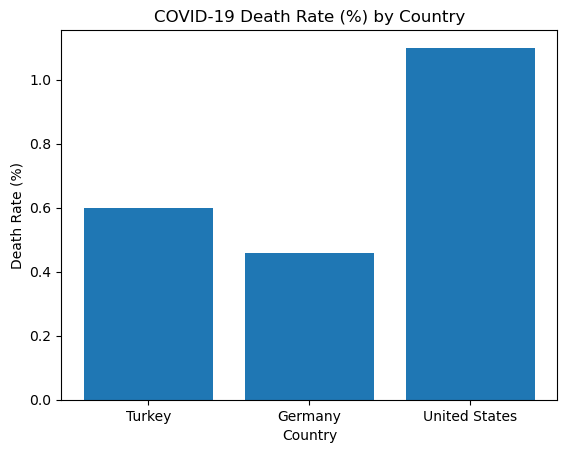

In [28]:
plt.figure()
plt.bar(
    latest_data['location'],
    latest_data['death_rate_percent']
)

plt.title("COVID-19 Death Rate (%) by Country")
plt.xlabel("Country")
plt.ylabel("Death Rate (%)")
plt.show()

### Interpretation of Death Rate Chart

**Observation:**  
The bar chart shows that COVID-19 death rates vary across countries.  
Some countries exhibit higher mortality rates, which may be influenced
by factors such as healthcare capacity, testing policies, population age,
and vaccination coverage.

**Limitation:**  
The death rate is calculated using reported cases and deaths, 
and may be affected by differences in data reporting practices.


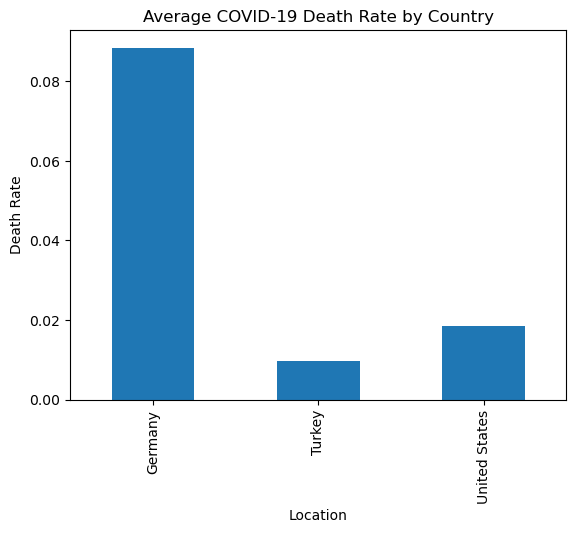

In [31]:
avg_death_rate = df.groupby('location')['death_rate'].mean()

avg_death_rate.plot(kind='bar')
plt.title("Average COVID-19 Death Rate by Country")
plt.xlabel("Location")
plt.ylabel("Death Rate")
plt.show()